### Assignment: Filtering and Histograms

### Imports

In [29]:
import numpy as np
import soundfile as sf # for working with soundfiles
import matplotlib.pyplot as plt # for plotting
from scipy.signal import convolve # for convolving the soundsignals
from skimage.io import imread
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.color import rgb2hsv, hsv2rgb

## 1. Pixel-wise contrast enhancement (pls indsæt simone)

### 1.1


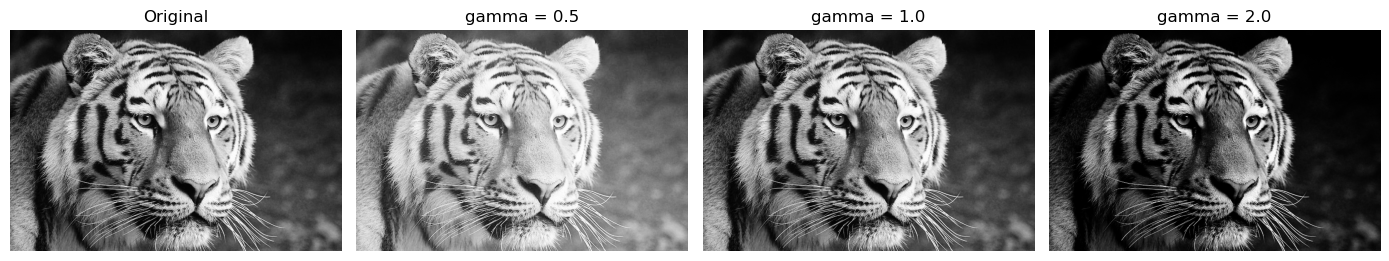

In [30]:
def gamma_transform(I, gamma):
    return I ** gamma

I = imread("data/tiger.jpg")
I = img_as_float(I)

if I.ndim == 3:
    I = rgb2gray(I)

gammas = [0.5, 1.0, 2.0]

fig, axes = plt.subplots(1, len(gammas)+1, figsize=(14,4))
axes[0].imshow(I, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

# Apply gamma correction to image for each value of gamma
for i, g in enumerate(gammas):
    J = gamma_transform(I, g)
    axes[i+1].imshow(J, cmap="gray")
    axes[i+1].set_title(f"gamma = {g}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

### 1.2


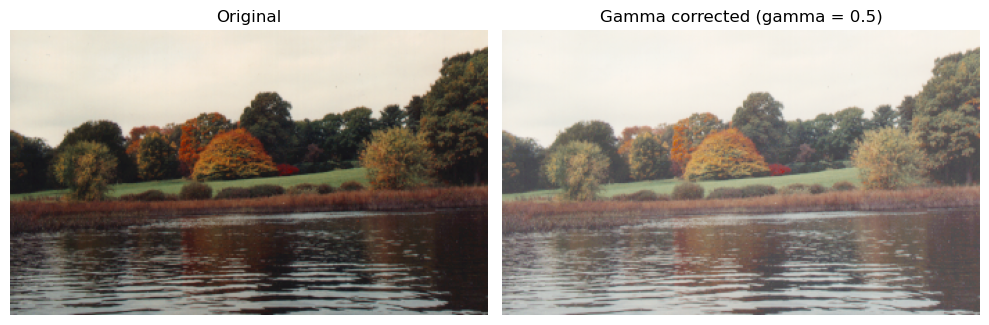

In [31]:

I = imread("data/autumn.tif")
I = img_as_float(I)

gamma = 0.5

# Apply gamma correction to each RGB channel separately
R = gamma_transform(I[:, :, 0], gamma)
G = gamma_transform(I[:, :, 1], gamma)
B = gamma_transform(I[:, :, 2], gamma)

# Recombine channels
I_gamma = np.stack((R, G, B), axis=2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(I)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(I_gamma)
axes[1].set_title(f"Gamma corrected (gamma = {gamma})")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### 1.3

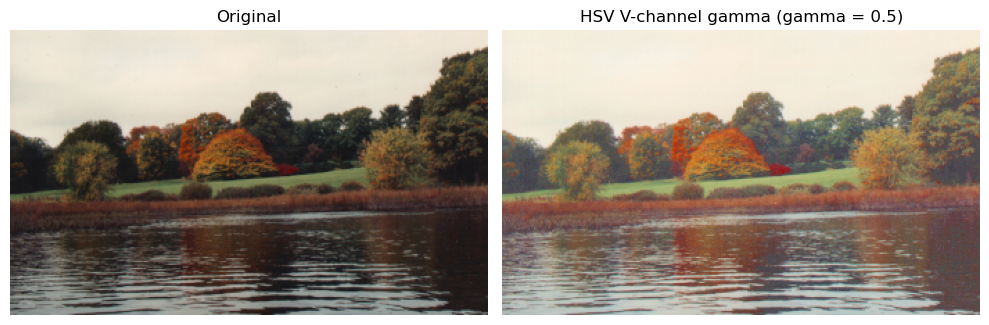

In [32]:

I_rgb = img_as_float(imread("data/autumn.tif"))
# Convert to HSV
I_hsv = rgb2hsv(I_rgb)

# Apply gamma correction to V channel only
I_hsv_gamma = I_hsv.copy()
I_hsv_gamma[:, :, 2] = gamma_transform(I_hsv_gamma[:, :, 2], gamma)  # V channel

# Convert back to RGB
I_rgb_gamma = hsv2rgb(I_hsv_gamma)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(I_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(I_rgb_gamma)
axes[1].set_title(f"HSV V-channel gamma (gamma = {gamma})")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 2. Reverb Convolution

### 2.1

The shape of our soundbyte is (331776, 2)
the samplerate of the soundbyte is 96000


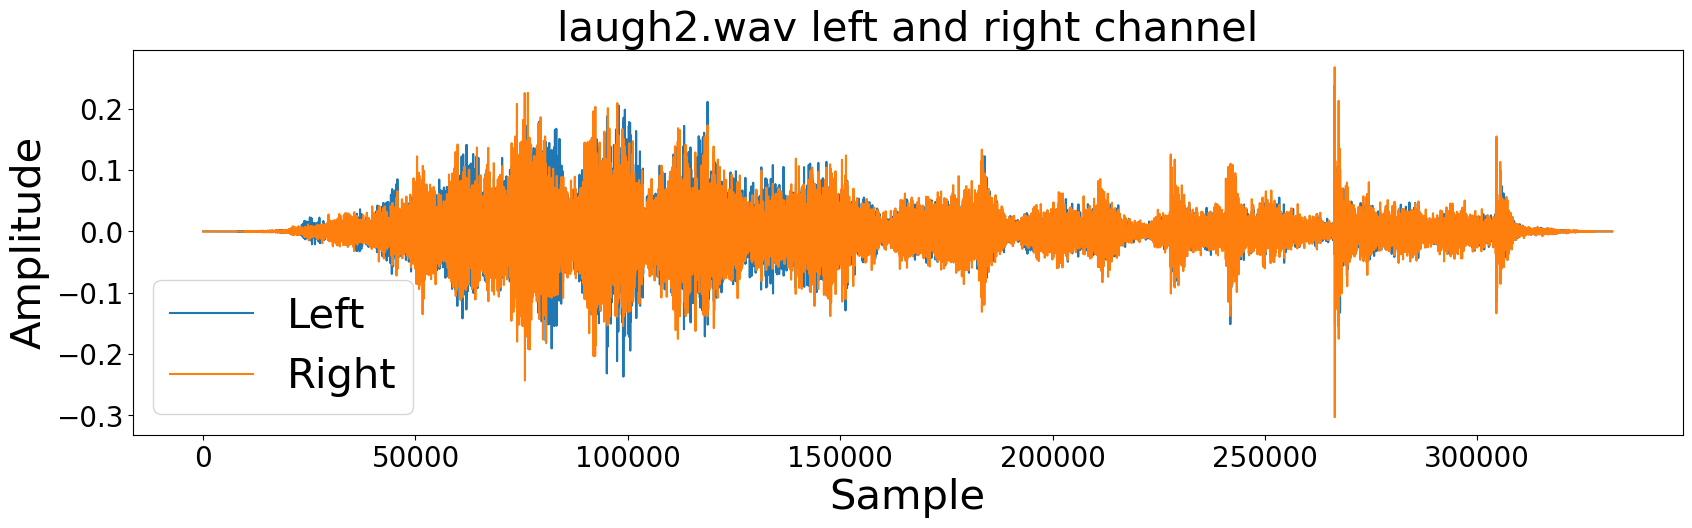

In [33]:


#Note this code is taken straaaigt from soundfiles_example.py found on the course absalon page

#Load the soundfile
soundbyte21, soundbyte_samplerate21 = sf.read('data/samples/laugh2.wav')

# soundbyte is now a 2D numpy array
print('The shape of our soundbyte is',soundbyte21.shape)
print('the samplerate of the soundbyte is', soundbyte_samplerate21)

# It has two channels in this case, one for each 'ear', left and right
# we can plot these waves 
Left = soundbyte21[:,0]
Right = soundbyte21[:,1]

plt.figure(figsize=(20,5))
plt.plot(Left, label='Left') # Alpha makes overlapping lines easier to see
plt.plot(Right, label='Right')

# Adding the labels
# Increase size for both x and y axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sample', fontsize=30)
plt.ylabel('Amplitude', fontsize=30)
plt.title('laugh2.wav left and right channel', fontsize=30)

plt.legend(fontsize=30) # fontsize for legend

plt.show()

### 2.2

In [34]:
# reverb: convolve a soundbyte with an impuls signal
# choose  sample from the sound sample folder y
# choose  impuls from the sound impuls/claps folder y
# choose  impuls from the sound impuls/splashes folder y

# convolve the sound sample with each impulse
# plot the original soundbyte
# plot the two response signals

The shape of hiss soundbyte is (200000,)
The shape of clap soundbyte is (179297, 2)
The shape of splash soundbyte is (764241, 2)


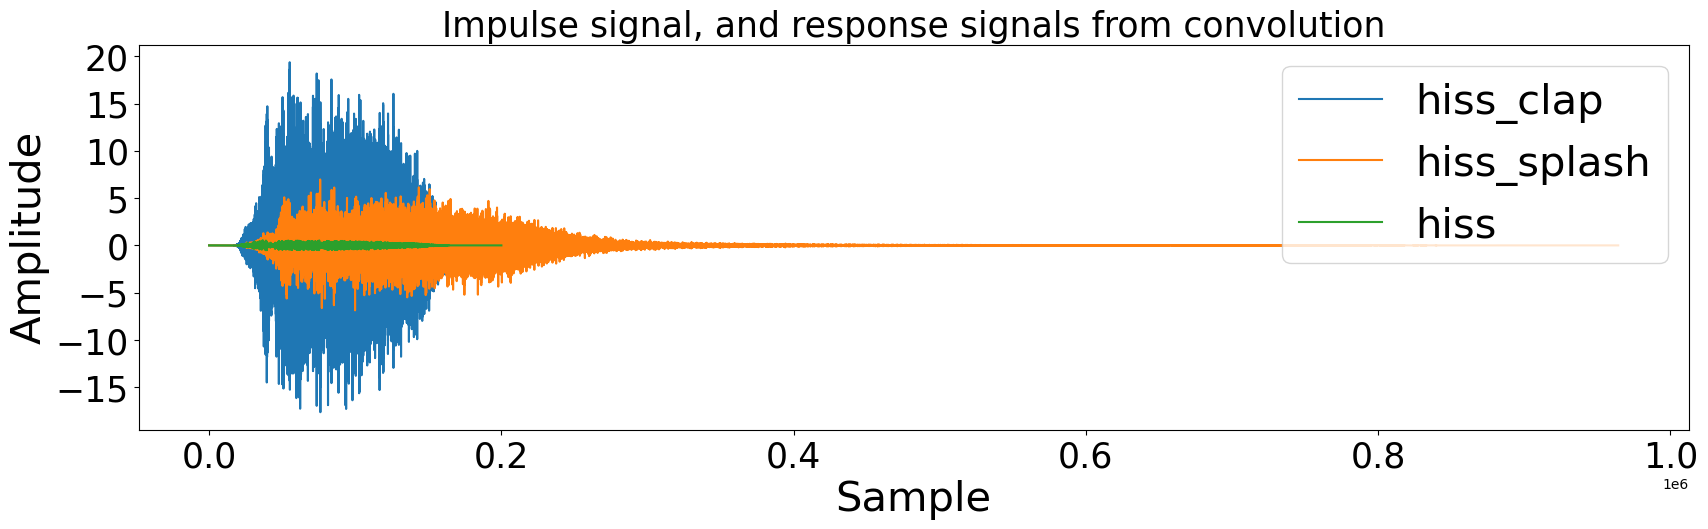

In [35]:

#Load the soundfile
hiss, hiss_samplerate = sf.read('data/samples/hiss.wav')
clap, clap_samplerate = sf.read('data/impulses/claps.wav')
splash, splash_samplerate21 = sf.read('data/impulses/Splash_1.wav')

# what are the dimensions of the soundbyte, mono or stereo?
print('The shape of hiss soundbyte is',hiss.shape) # mono
print('The shape of clap soundbyte is',clap.shape) #stereo
print('The shape of splash soundbyte is',splash.shape) #stereo

#convert clap and splash to mono
clap_mono = np.mean(clap, axis=1)
splash_mono = np.mean(splash, axis=1)

# convolve
hiss_clap = convolve(hiss, clap_mono, mode= 'full')
hiss_splash = convolve(hiss, splash_mono, mode= 'full')

# plot them all
plt.figure(figsize=(20,5))
plt.plot(hiss_clap, label='hiss_clap')
plt.plot(hiss_splash, label='hiss_splash')
plt.plot(hiss, label='hiss')


# Adding the labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Sample', fontsize=30)
plt.ylabel('Amplitude', fontsize=30)
plt.title('Impulse signal, and response signals from convolution', fontsize=25)
plt.legend(fontsize = 30)


In [36]:
# save the reverb soundfiles to disk

# sf.write('hiss_clap_reverb_LOUD.wav', hiss_clap, hiss_samplerate)
# sf.write('hiss_splash_reverb_LOUD.wav', hiss_splash, hiss_samplerate)

## That is LOUD!!!! FUCKS SAKE


## 3. Image filtering and enhancement

### 3.1 (done by group member)

### 3.2 — Gaussian filter with fixed σ=5 and increasing kernel size N

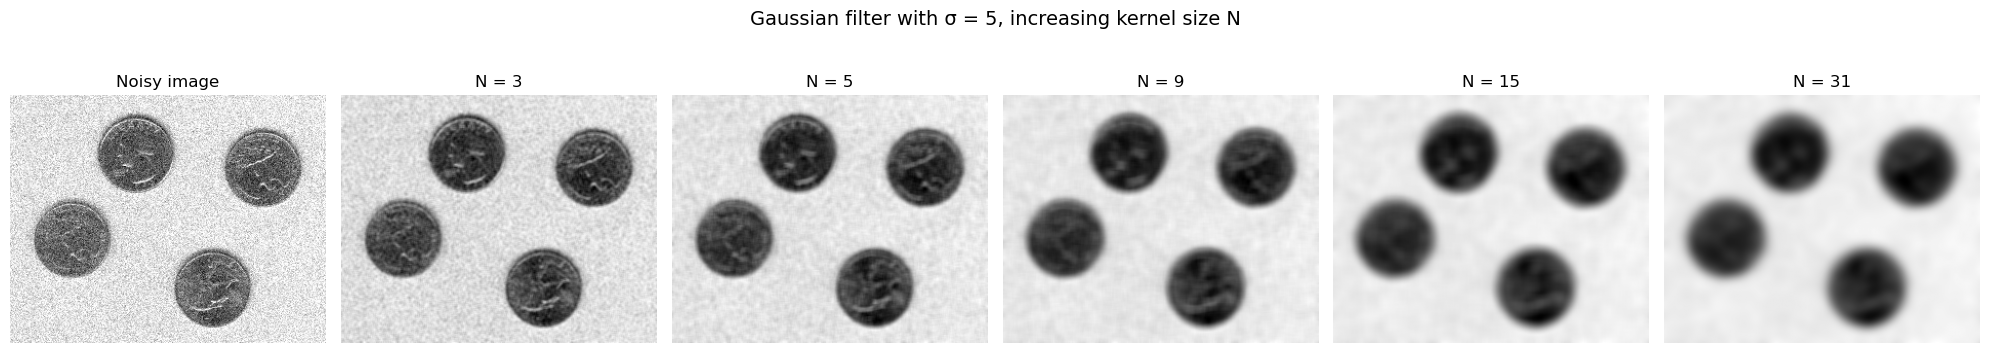

In [37]:
# Load eight.tif as grayscale and add Gaussian noise
eight = img_as_float(imread('data/eight.tif'))
if eight.ndim == 3:
    eight = rgb2gray(eight)

eight_noisy = random_noise(eight, mode='gaussian', var=0.01)

# Apply Gaussian filter with fixed sigma=5 and increasing kernel sizes N
# skimage.filters.gaussian uses truncate parameter: kernel radius = truncate * sigma
# So kernel size N = 2 * truncate * sigma + 1, meaning truncate = (N - 1) / (2 * sigma)
sigma = 5
kernel_sizes = [3, 5, 9, 15, 31]

fig, axes = plt.subplots(1, len(kernel_sizes) + 1, figsize=(20, 4))

axes[0].imshow(eight_noisy, cmap='gray')
axes[0].set_title('Noisy image')
axes[0].axis('off')

for i, N in enumerate(kernel_sizes):
    truncate = (N - 1) / (2 * sigma)
    filtered = gaussian(eight_noisy, sigma=sigma, truncate=truncate)
    axes[i + 1].imshow(filtered, cmap='gray')
    axes[i + 1].set_title(f'N = {N}')
    axes[i + 1].axis('off')

plt.suptitle(f'Gaussian filter with σ = {sigma}, increasing kernel size N', fontsize=14)
plt.tight_layout()
plt.show()

When $N$ is small (e.g. 3 or 5), the kernel is heavily truncated and most of the Gaussian is cut off, so the filter has little effect. As $N$ increases, the result converges — once $N \geq 3\sigma$ (here $N \geq 15$), the Gaussian tails beyond the kernel are negligibly small, so further increasing $N$ produces virtually no change in the output.

### 3.3 — Gaussian filter with increasing σ, kernel size N = 3σ

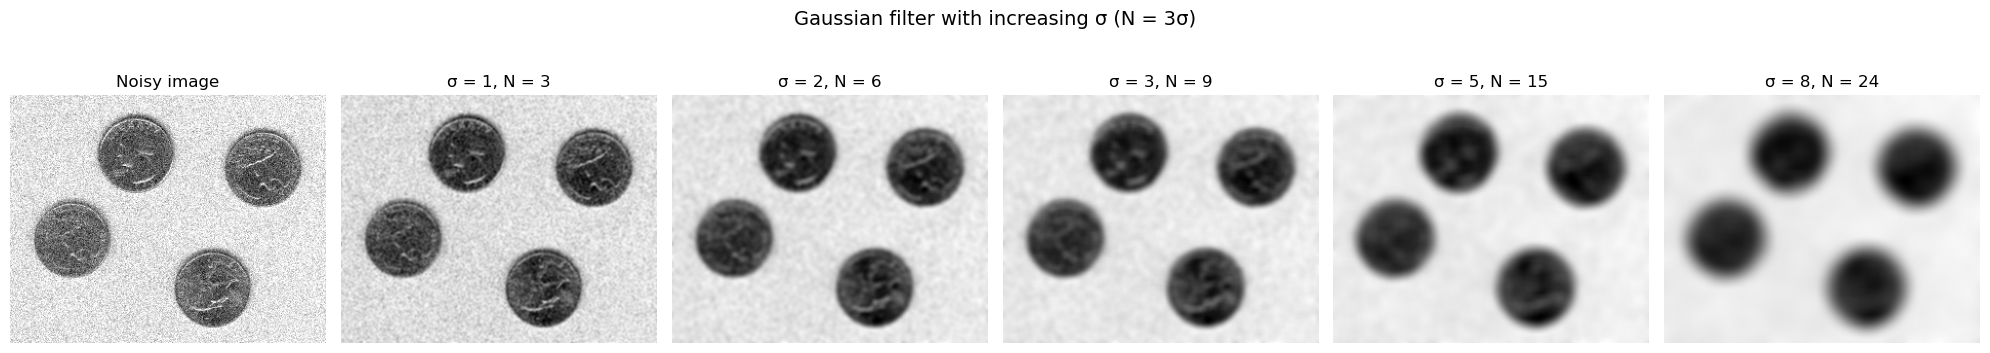

In [38]:
# Apply Gaussian filter with increasing sigma, choosing N = 3*sigma for kernel size
sigmas = [1, 2, 3, 5, 8]

fig, axes = plt.subplots(1, len(sigmas) + 1, figsize=(20, 4))

axes[0].imshow(eight_noisy, cmap='gray')
axes[0].set_title('Noisy image')
axes[0].axis('off')

for i, s in enumerate(sigmas):
    N = int(3 * s)
    # truncate so that kernel size = 2*truncate*sigma + 1 = N
    truncate = (N - 1) / (2 * s) if s > 0 else 0
    filtered = gaussian(eight_noisy, sigma=s, truncate=max(truncate, 0.1))
    axes[i + 1].imshow(filtered, cmap='gray')
    axes[i + 1].set_title(f'σ = {s}, N = {N}')
    axes[i + 1].axis('off')

plt.suptitle('Gaussian filter with increasing σ (N = 3σ)', fontsize=14)
plt.tight_layout()
plt.show()

As σ increases, more noise is removed but the image also becomes increasingly blurred — fine details and edges are lost. At small σ (e.g. σ=1), the filter removes some noise while preserving most of the image structure. At large σ (e.g. σ=8), the image is heavily smoothed and edges are no longer sharp. This illustrates the fundamental tradeoff between denoising and sharpness: stronger smoothing removes more noise but also destroys image detail.

## 4. Histogram-based processing

### 4.1 — Cumulative Distribution Function (CDF)

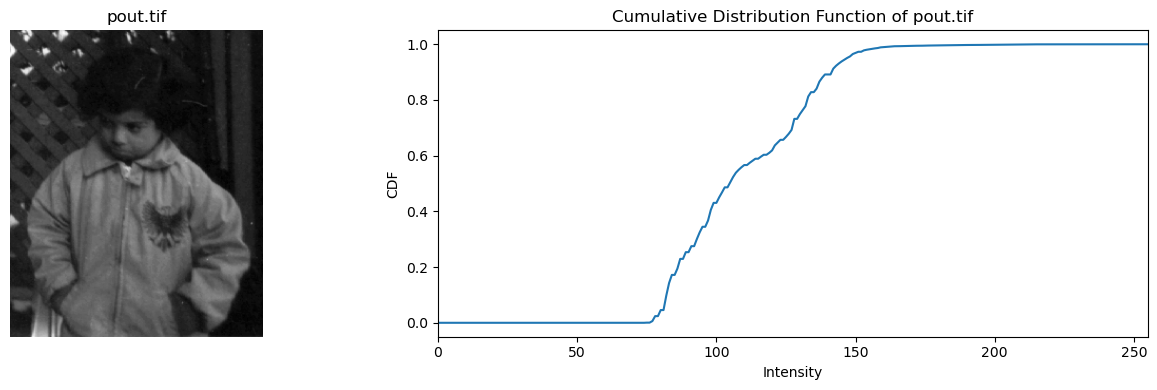

In [39]:
def compute_cdf(image):
    """
    Compute the cumulative distribution function (CDF) of a grayscale image.
    Input: grayscale image with integer intensities in [0, 255].
    Returns: (cdf, bins) where cdf is normalized to [0, 1] and has 256 entries.
    """
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]  # normalize to [0, 1]
    return cdf, bins

# Load pout.tif as grayscale
pout = imread('data/pout.tif')
if pout.ndim == 3:
    pout = rgb2gray(pout)
    pout = img_as_ubyte(pout)

# Compute and plot the CDF
cdf_pout, bins_pout = compute_cdf(pout)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].imshow(pout, cmap='gray')
axes[0].set_title('pout.tif')
axes[0].axis('off')

axes[1].plot(range(256), cdf_pout)
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('CDF')
axes[1].set_title('Cumulative Distribution Function of pout.tif')
axes[1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

Regions of fast increase in the CDF correspond to intensity values where many pixels are concentrated — these are the dominant intensities in the image. Flat regions of the CDF correspond to intensity ranges that contain few or no pixels in the image.

### 4.2 — Apply CDF mapping C(I)

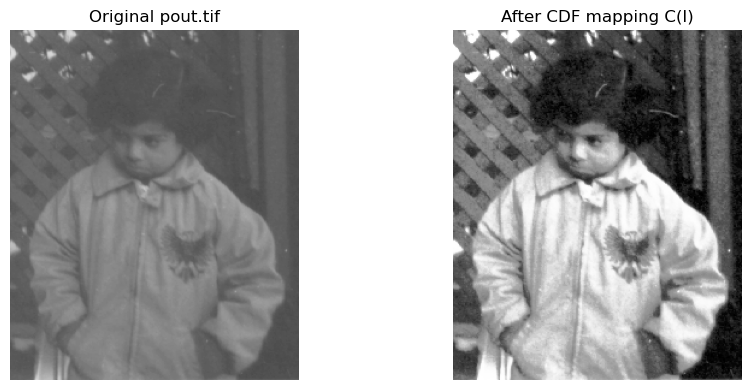

In [40]:
def apply_cdf(image, cdf):
    """
    Given a grayscale image I and its CDF C, compute the floating-point image C(I)
    such that the intensity at each pixel (x, y) is C(I(x, y)).
    Input: image with integer intensities in [0, 255], cdf array of length 256.
    Returns: floating-point image with values in [0, 1].
    """
    return cdf[image]

# Apply CDF mapping to pout.tif (histogram equalization)
pout_equalized = apply_cdf(pout, cdf_pout)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(pout, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original pout.tif')
axes[0].axis('off')

axes[1].imshow(pout_equalized, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('After CDF mapping C(I)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.3 — Pseudo-inverse of the CDF

The CDF is in general not invertible because it is a staircase function — when the histogram has zero counts at some intensity values, the CDF is flat over those ranges, meaning multiple input values $l$ would map to the same output $C(s)$. Since the function is not strictly increasing, the standard inverse does not exist. To overcome this, we use the pseudo-inverse $C^{-1}(l) = \min\{s \mid C(s) \geq l\}$.

In [41]:
def pseudo_inverse_cdf(cdf, l):
    """
    Compute the pseudo-inverse of a CDF: C^{-1}(l) = min{s | C(s) >= l}.
    Input: cdf array of length 256, l a float value in [0, 1].
    Returns: integer s in [0, 255].
    """
    indices = np.where(cdf >= l)[0]
    return int(np.min(indices))

### 4.4 — Histogram matching

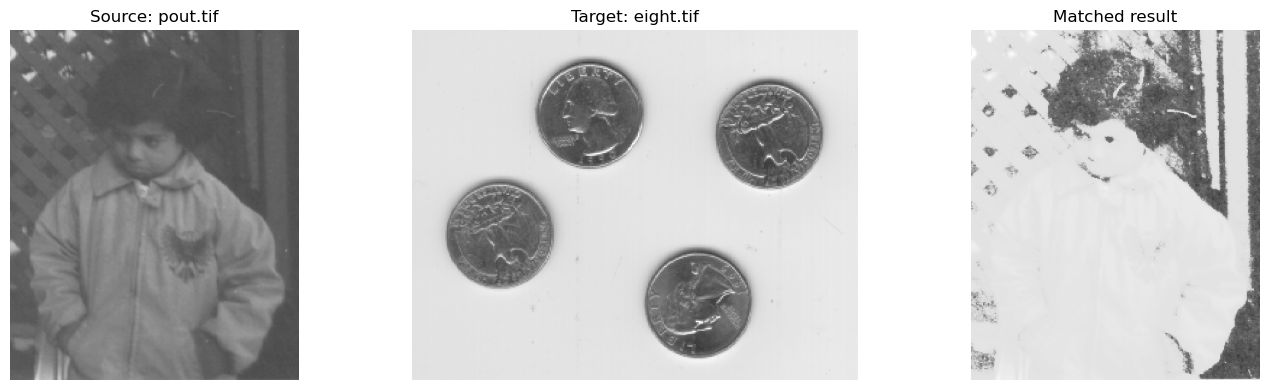

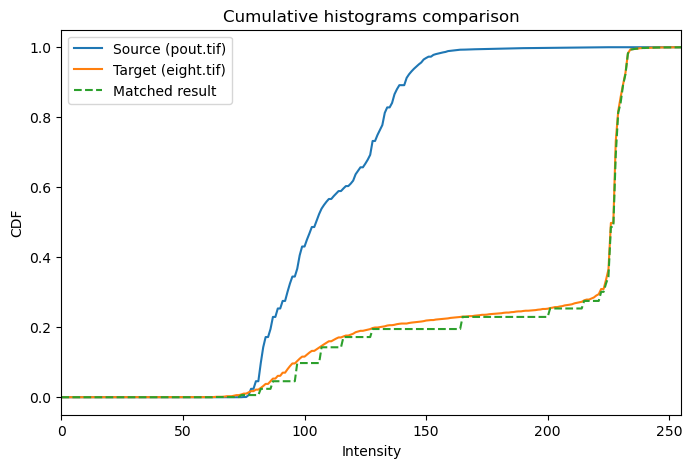

In [42]:
def histogram_match(I1, I2):
    """
    Perform histogram matching: transform I1 so its histogram matches that of I2.
    Uses the mapping: J(x,y) = C2_inv(C1(I1(x,y)))
    Input: two grayscale images with integer intensities in [0, 255].
    Returns: matched image (uint8).
    """
    cdf1, _ = compute_cdf(I1)
    cdf2, _ = compute_cdf(I2)

    # Build a lookup table: for each intensity s in I1,
    # map it through C1 to get l = C1(s), then apply C2_inv(l)
    lookup = np.zeros(256, dtype=np.uint8)
    for s in range(256):
        l = cdf1[s]
        lookup[s] = pseudo_inverse_cdf(cdf2, l)

    # Apply the lookup table to I1
    J = lookup[I1]
    return J

# Load eight.tif as grayscale uint8 for the target histogram
eight_gray = imread('data/eight.tif')
if eight_gray.ndim == 3:
    eight_gray = rgb2gray(eight_gray)
    eight_gray = img_as_ubyte(eight_gray)

# Perform histogram matching: match pout.tif to eight.tif
matched = histogram_match(pout, eight_gray)

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(pout, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Source: pout.tif')
axes[0].axis('off')

axes[1].imshow(eight_gray, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Target: eight.tif')
axes[1].axis('off')

axes[2].imshow(matched, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Matched result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Plot and compare the cumulative histograms
cdf_source, _ = compute_cdf(pout)
cdf_target, _ = compute_cdf(eight_gray)
cdf_matched, _ = compute_cdf(matched)

plt.figure(figsize=(8, 5))
plt.plot(range(256), cdf_source, label='Source (pout.tif)')
plt.plot(range(256), cdf_target, label='Target (eight.tif)')
plt.plot(range(256), cdf_matched, '--', label='Matched result')
plt.xlabel('Intensity')
plt.ylabel('CDF')
plt.title('Cumulative histograms comparison')
plt.legend()
plt.xlim([0, 255])
plt.show()